In [3]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# checking the data
train_revised = pd.read_csv("Data/train_revised.csv")
train_revised.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [5]:
# drop columns we dont need
train_revised.drop(columns = ["payment_method", "payment_receipt", "travel_to"], inplace=True)

In [6]:
# drop duplicates. (cant have the same seat number on the same ride_id twice)
train_revised.drop_duplicates(inplace = True)

In [7]:
# get rid of columns we don't need
train_revised.drop(columns = ["seat_number"], inplace=True)

In [8]:
# need to add column for number of tickets sold for each ride_id
number_of_ticket = train_revised.groupby("ride_id").travel_time.count()

In [9]:
# drop duplicate rows. We want each ride_id to be a unique observation.
train_revised.drop_duplicates(inplace=True)

In [10]:
# set index to ride_id
train_revised.set_index("ride_id", inplace=True)

In [11]:
# add ticket column
train_revised["number_of_ticket"] = number_of_ticket

In [12]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
ride_id,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1
5437,19-11-17,7:12,Migori,Bus,49,1
5710,26-11-17,7:05,Keroka,Bus,49,1
5777,27-11-17,7:10,Homa Bay,Bus,49,5
5778,27-11-17,7:12,Migori,Bus,49,30


In [13]:
# now we want to add a column with the time stuff together and make it a time series data type
train_revised["full_date"] = train_revised.travel_date + " " + train_revised.travel_time 

In [14]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,full_date
ride_id,,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1,17-10-17 7:15
5437,19-11-17,7:12,Migori,Bus,49,1,19-11-17 7:12
5710,26-11-17,7:05,Keroka,Bus,49,1,26-11-17 7:05
5777,27-11-17,7:10,Homa Bay,Bus,49,5,27-11-17 7:10
5778,27-11-17,7:12,Migori,Bus,49,30,27-11-17 7:12


In [15]:
# change to time series data type
train_revised.full_date = pd.to_datetime(train_revised.full_date, infer_datetime_format=True)

In [16]:
# add column with week day of ride_id
train_revised["day_of_week"] = train_revised.full_date.dt.weekday

In [17]:
# add column with month of ride_id
train_revised["month"]= train_revised.full_date.dt.month

In [18]:
# now its time to group times in morning, afternoon, evening, and night. Feel free to change around the bounds if you like.

def get_travel_time_type(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )
train_revised['travel_time_type'] = train_revised.full_date.apply(lambda x: get_travel_time_type(x.hour)) 

In [19]:
train_revised.head()

,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,full_date,day_of_week,month,travel_time_type
ride_id,,,,,,,,,,
1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,10,morning
5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,11,morning
5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,11,morning
5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,11,morning
5778,27-11-17,7:12,Migori,Bus,49,30,2017-11-27 07:12:00,0,11,morning


In [20]:
# getting rid of columns we don't need
#If you think we need the travel_time and travel_date columns seperately feel free to edit this
train_revised.drop(columns = ["travel_time", "travel_date", "car_type"], inplace=True)

In [21]:
# making month and day of week columns more easily readable
train_revised.day_of_week.replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 
                                   5:"Saturday", 6:"Sunday"}, inplace=True)
train_revised.month.replace({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 
                                   6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)

In [22]:
train_revised.head()

,travel_from,max_capacity,number_of_ticket,full_date,day_of_week,month,travel_time_type
ride_id,,,,,,,
1442,Migori,49,1,2017-10-17 07:15:00,Tuesday,October,morning
5437,Migori,49,1,2017-11-19 07:12:00,Sunday,November,morning
5710,Keroka,49,1,2017-11-26 07:05:00,Sunday,November,morning
5777,Homa Bay,49,5,2017-11-27 07:10:00,Monday,November,morning
5778,Migori,49,30,2017-11-27 07:12:00,Monday,November,morning


In [23]:
# changing categorical columns to category type, some ordered

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]
train_revised.month = pd.Categorical(train_revised['month'], categories=months, ordered=True)
train_revised.day_of_week = pd.Categorical(train_revised['day_of_week'], categories=days, ordered=True)
train_revised.car_type = train_revised.max_capacity.astype("category")
train_revised.travel_from = train_revised.travel_from.astype("category")
train_revised.travel_time_type = train_revised.travel_time_type.astype("category")

In [24]:
# Shifting the number_of_ticket column to the end to make it look nicer
df1 = train_revised.pop('number_of_ticket')
train_revised['number_of_ticket'] = df1

In [25]:
train_revised.head()

,travel_from,max_capacity,full_date,day_of_week,month,travel_time_type,number_of_ticket
ride_id,,,,,,,
1442,Migori,49,2017-10-17 07:15:00,Tuesday,October,morning,1
5437,Migori,49,2017-11-19 07:12:00,Sunday,November,morning,1
5710,Keroka,49,2017-11-26 07:05:00,Sunday,November,morning,1
5777,Homa Bay,49,2017-11-27 07:10:00,Monday,November,morning,5
5778,Migori,49,2017-11-27 07:12:00,Monday,November,morning,30


In [26]:
#Now its data analysis time! Although we could add some more columns or something if you guys want.

<AxesSubplot:xlabel='number_of_ticket', ylabel='Count'>

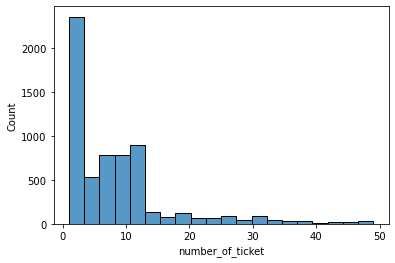

In [27]:
# Most of the rides have 10 or less tickets.
sns.histplot(train_revised.number_of_ticket, bins=20)

<AxesSubplot:xlabel='max_capacity', ylabel='count'>

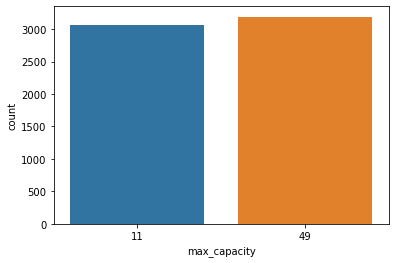

In [28]:
# There are about the same amount of shuttles and buses in the data
sns.countplot(train_revised.max_capacity)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

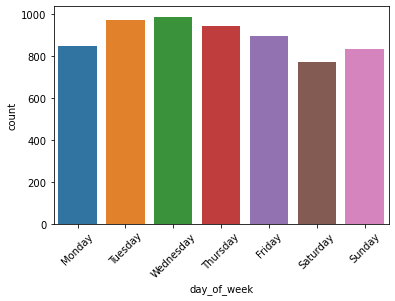

In [29]:
# It seems that we have less weekend trips in the data but still relatively same amount for each week day.
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(train_revised.day_of_week)

<AxesSubplot:xlabel='travel_from', ylabel='count'>

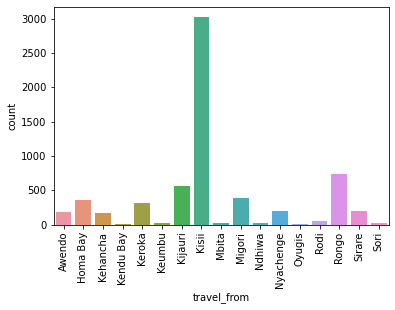

In [30]:
# Almost half of the trips are from Kisii
plt.xticks(rotation=90)
sns.countplot(train_revised.travel_from)

In [31]:
# It seems that shuttles from Kisii are the majority of the observations in the data
pd.crosstab(train_revised.travel_from, train_revised.max_capacity)

max_capacity,11,49
travel_from,,
Awendo,0,185
Homa Bay,0,356
Kehancha,0,172
Kendu Bay,0,1
Keroka,149,163
Keumbu,17,3
Kijauri,395,161
Kisii,2499,521
Mbita,0,21


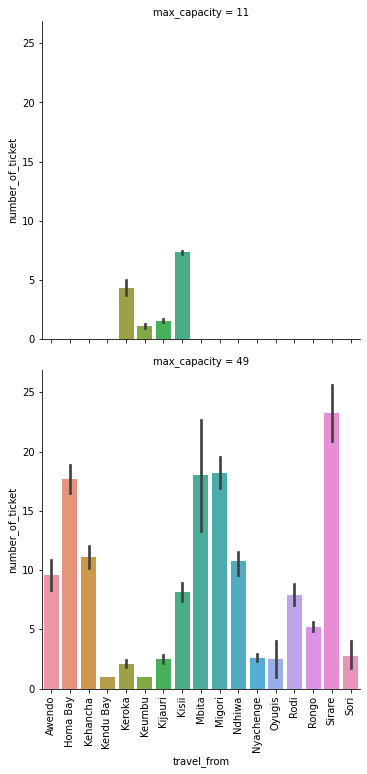

In [32]:
travel_from_bar = sns.catplot(x = "travel_from", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "bar")
travel_from_bar.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='travel_time_type', ylabel='count'>

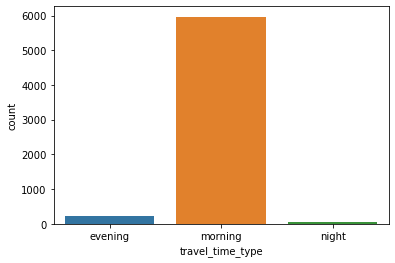

In [33]:
# There appear to be no afternoon trips. Most trips occur in the morning.
sns.countplot(train_revised.travel_time_type)

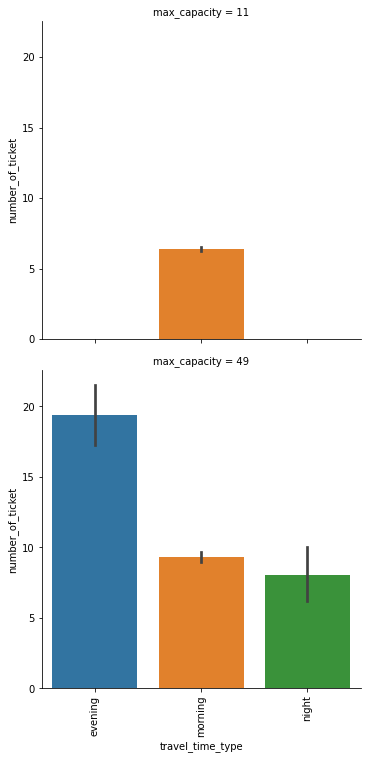

In [36]:
# evening trips sell the most tickets
travel_type_bar = sns.catplot(x = "travel_time_type", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "bar")
travel_type_bar.set_xticklabels(rotation=90)

In [37]:
#Shuttles are only in the morning
pd.crosstab(train_revised.travel_time_type, train_revised.max_capacity)

max_capacity,11,49
travel_time_type,,
evening,0,225
morning,3060,2903
night,0,61


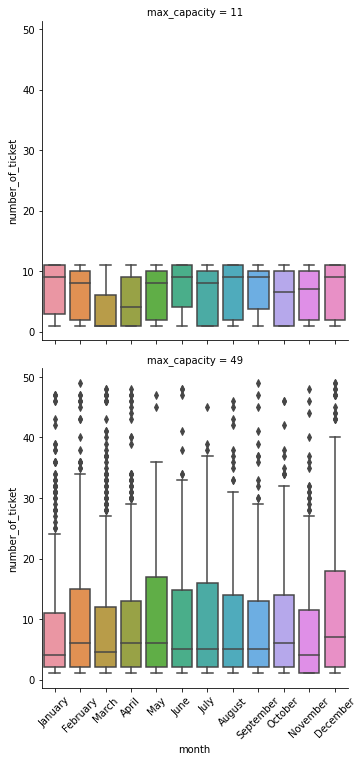

In [38]:
ticket_per_month = sns.catplot(x = "month", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "box")
ticket_per_month.set_xticklabels(rotation=45)

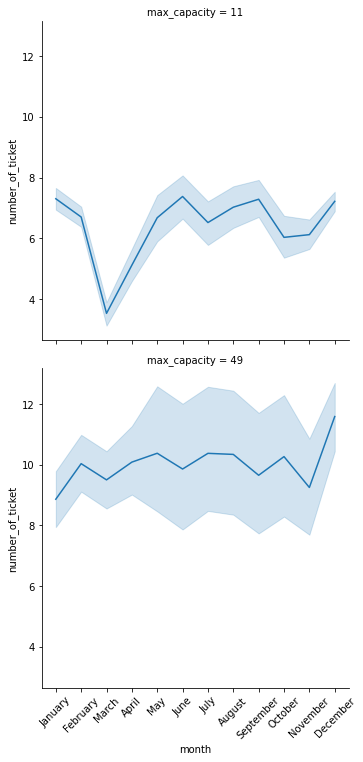

In [39]:
# It seems that monthly trends are differnt for shuttles and buses. Shuttles appear to be more volatile in monthly ticket sales.

ticket_per_month_line = sns.relplot(x = "month", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "line")
ticket_per_month_line.set_xticklabels(rotation=45)

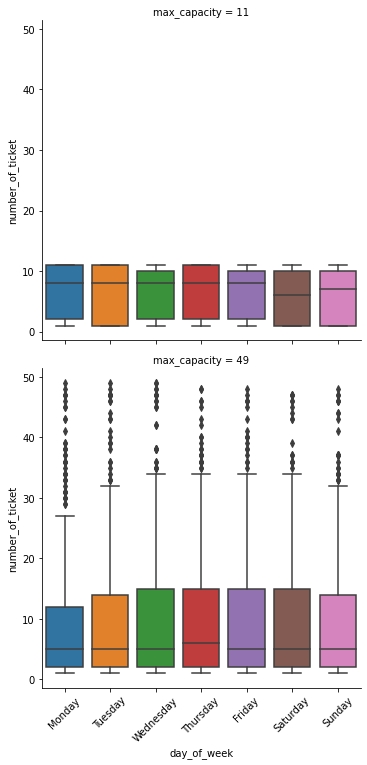

In [40]:
ticket_per_day = sns.catplot(x = "day_of_week", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "box")
ticket_per_day.set_xticklabels(rotation=45)

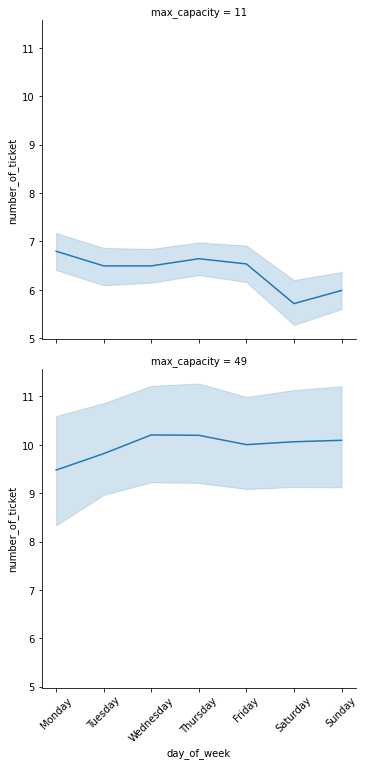

In [41]:
# Shuttles appear to sell less on the weekend and more during the weekdays. Buses sell the least during Monday and Tuesday but stabilize afterwards.
ticket_per_day_line = sns.relplot(x = "day_of_week", y= "number_of_ticket", row = "max_capacity", data = train_revised, kind = "line")
ticket_per_day_line.set_xticklabels(rotation=45)